# FindMeGlutenFree.com EDA / Visualizations Python Code

### Initial Cleaning and New Feature Generation

In [83]:
# Loading scraped dataset and initial packages
import numpy as np
import pandas as pd
gf_data = pd.read_csv('findmegflong.csv').set_index('name')
gf_data.columns = ['address', 'avg_rating', 'business_url', 'rest_tags', 'city',
       'dedicated_fryer', 'dedicated_gf', 'food_tags', 'gf_menu',
       'how_expensive', 'num_ratings', 'num_reviews', 'page_url', 'phone',
       'review_rating', 'review_text', 'reviewer_name', 'state',
       'total_celiac_friendly', 'total_not_celiac_friendly',
       'total_reviewers_celiac', 'zipcode']

In [84]:
# Cleaning data
gf_data['how_expensive'] = gf_data['how_expensive'].replace(['$','$$','$$$','$$$$'],[1,2,3,4])
gf_data['state'] = gf_data['state'].str.upper()
gf_data['city'] = gf_data['city'].str.strip()
gf_data['city'] = gf_data['city'].replace(['#109','#300 Austin','1 Pennsylvania Plaza',\
                                                   '1401 Ocean Avenue','2101 South Street',
                                                   'IL 60622', 'CO', 'Encinatas', 'NY 10019',\
                                                   'The Bronx', 'San DiegO','San Diego‎ CA‎ 92126',\
                                                   'Suite 107 Chicago', 'New York City', 'Washington D.C.',\
                                                   'Washington', '801 9th St NW Ste. A','TX 78704',\
                                                   'TN', '118 Losoya Street', '1225 1st Avenue',\
                                                   '161 8th Avenue', '2 TIMES SQUARE', '592 9th Ave',\
                                                   '184 Steele Street', '8314 NORTHFIELD BLVD',\
                                                    'Prospect St'],\
                                                  ['San Diego', 'Austin', 'New York', \
                                                   'Santa Monica', 'Philadelphia', \
                                                   'Chicago', 'Denver', 'Encinitas', 'New York',\
                                                   'Bronx', 'San Diego','San Diego',\
                                                   'Chicago', 'New York', 'Washington DC',\
                                                   'Washington DC', 'Washington DC', 'Austin',\
                                                   'Nashville', 'San Antonio', 'Seattle',\
                                                   'New York', 'New York', 'New York',\
                                                   'Denver', 'Denver',\
                                                   'San Diego'])

# Creating "Metro" feature for Metropolitan Areas
gf_data['metro'] = gf_data['city']
gf_data['metro'] = gf_data['metro'].replace(['Boulder', 'Bronx', 'Brooklyn', 'Cambridge',\
                                          'Camden', 'Carlsbad', 'Centennial', 'Cherry Creek',\
                                          'Edgewater', 'Ellis Island', 'Encinitas',\
                                          'Englewood', 'Evanston', 'Glendale', 'Golden',\
                                          'Hollywood', 'Jersey City', 'La Jolla',\
                                          'La Mesa', 'Manhattan', 'Point Loma',\
                                          'Riverdale', 'Rye', 'Santa Monica', 'Somerville',
                                          'Wheat Ridge'],\
                                          ['Denver', 'New York', 'New York', 'Boston',\
                                          'Philadelphia', 'San Diego', 'Denver', 'Denver',\
                                          'Denver', 'New York', 'San Diego',\
                                          'Denver', 'Chicago', 'Denver', 'Denver',\
                                          'Los Angeles', 'New York', 'San Diego',\
                                          'San Diego', 'New York', 'San Diego',\
                                          'New York', 'New York', 'Los Angeles', 'Boston',\
                                          'Denver'])

# Creating new Celiac-related features 
gf_data['perc_users_celiac'] = gf_data['total_reviewers_celiac'] / gf_data['num_reviews']
gf_data['perc_users_celiac'][np.isinf(gf_data['perc_users_celiac'])] = np.nan
gf_data['perc_rest_celiac_friendly'] = gf_data['total_celiac_friendly'] / gf_data['num_reviews']
gf_data['perc_rest_celiac_friendly'][np.isinf(gf_data['perc_rest_celiac_friendly'])] = np.nan
gf_data['perc_rest_celiac_unfriendly'] = gf_data['total_not_celiac_friendly'] / gf_data['num_reviews']
gf_data['perc_rest_celiac_unfriendly'][np.isinf(gf_data['perc_rest_celiac_unfriendly'])] = np.nan
gf_data['perc_diff_celiac_friendliness'] = gf_data['perc_rest_celiac_friendly'] - gf_data['perc_rest_celiac_unfriendly']

pd.options.display.max_columns = None
gf_data

C:\Users\gottl\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gottl\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\gottl\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,address,avg_rating,business_url,rest_tags,city,dedicated_fryer,dedicated_gf,food_tags,gf_menu,how_expensive,num_ratings,num_reviews,page_url,phone,review_rating,review_text,reviewer_name,state,total_celiac_friendly,total_not_celiac_friendly,total_reviewers_celiac,zipcode,metro,perc_users_celiac,perc_rest_celiac_friendly,perc_rest_celiac_unfriendly,perc_diff_celiac_friendliness
name,,,,,,,,,,,,,,,,,,,,,,,,,,,
Husk,37 Rutledge St,4.5,husknashville.com,"Bar,Late Night,Restaurant",Nashville,False,False,Celiac Friendly,False,4,6,21,https://www.findmeglutenfree.com/biz/husk/6655...,(615) 256-6565,"5 star rating,2 star rating,5 star rating,4 st...","The menu changes all the time, so check ahead,...","Megin,Jennifer,Blair,Caitlin,LMD. ,jordyn,Char...",TN,11,1,16,37210,Nashville,0.761905,0.523810,0.047619,0.476190
Whole Foods,3060 Excelsior Blvd,4.0,wholefoodsmarket.com,"Dairy-Free Friendly,Grocery Store,Lunch,Natura...",Minneapolis,False,False,"Beer,Cider,Dessert",False,1,3,52,https://www.findmeglutenfree.com/biz/whole-foo...,(612) 927-8141,"5 star rating,2 star rating,1 star rating,3 st...",They are now advertising that they have over 1...,"Josh,Eric Ivers,LIDA SUSAN,Ria,Breanna,Tammy,A...",MN,20,5,38,55416,Minneapolis,0.730769,0.384615,0.096154,0.288462
Hen House Eatery,114 South 8th Street,4.0,henhouseeatery.com,"Breakfast,Cafe,Lunch",Minneapolis,False,False,"Bread/Buns,Burgers,French Toast,Gluten Free Me...",True,2,19,18,https://www.findmeglutenfree.com/biz/hen-house...,(612) 345-4664,"5 star rating,5 star rating,3 star rating,1 st...","Most things can be made gluten free, including...","Rachel,Kris,Paige,glutenhater08,Leah W,laura,L...",MN,4,7,11,55402,Minneapolis,0.611111,0.222222,0.388889,-0.166667
SUGARFISH by sushi nozawa,6115 Sunset Blvd #170,5.0,sugarfishsushi.com,"Asian,Japanese,Restaurant",Los Angeles,False,False,"Celiac Friendly,Sushi",False,3,4,8,https://www.findmeglutenfree.com/biz/sugarfish...,(323) 320-4800,"4 star rating,5 star rating,5 star rating,5 st...",Excellent fish but alas they don’t carry GF so...,"GF Dad,Renee,Kaitlijn,gfjc,Wendy,Chad,lizgf,Emmy",CA,4,0,7,90028,Los Angeles,0.875000,0.500000,0.000000,0.500000
The Henry,3708 South Las Vegas Blvd,4.0,cosmopolitanlasvegas.com/restaurants/the-henry,"Late Night,Lunch,Restaurant",Las Vegas,False,False,"Bread/Buns,Burgers,Celiac Friendly,Gluten Free...",True,3,13,12,https://www.findmeglutenfree.com/biz/the-henry...,(702) 698-7980,"5 star rating,5 star rating,5 star rating,5 st...",Nice variety on the gluten free menu. Stumbled...,"Sid,Alise,Dangrdafne,gf hunger,Mark,allykitty,...",NV,4,1,10,89109,Las Vegas,0.833333,0.333333,0.083333,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Panchita's,3091 16th St,5.0,tablehero.com,"Late Night,Latin,Restaurant",San Francisco,True,False,"Celiac Friendly,Dedicated Fryer",False,2,4,4,https://www.findmeglutenfree.com/biz/panchitas...,(415) 431-4232,"5 star rating,5 star rating,5 star rating,5 st...",I've eaten here many times and not gotten sick...,"Marya,Noah,Alex,Ely",CA,4,0,4,94103,San Francisco,1.000000,1.000000,0.000000,1.000000
Dolores Park Cafe,501 Dolores Street,3.0,doloresparkcafe.org,"Breakfast,Cafe",San Francisco,False,False,"Cookies,Dessert,Muffins",False,1,2,2,https://www.findmeglutenfree.com/biz/dolores-p...,(415) 621-2936,"2 star rating,4 star rating",Stood waiting at the counter for ages before a...,"Colum,baldmamaspeaks",CA,0,0,1,94110,San Francisco,0.500000,0.000000,0.000000,0.000000
Bi-Rite Creamery,3692 18th St,5.0,biritecreamery.com,Ice Cream,San Francisco,False,False,"Dessert,Ice Cream Cones",False,1,5,0,https://www.findmeglutenfree.com/biz/bi-rite-c...,(415) 626-5600,NaN,NaN,NaN,CA,0,0,0,94110,San Francisco,NaN,NaN,NaN,NaN


In [85]:
# Creating a function to turn a list of "# star rating" per restaurant 
# into the percentage of each type of review (1-5)
def perc_ratings(ratings, num_):
    try:
        num_ratings = ratings.replace(' star rating', '')
        count_num_ = 0
        count_ = 0
        for C in num_ratings:
            if C == str(num_):
                count_num_ += 1
            if C in ['1','2','3','4','5']:
                count_ += 1
        return count_num_/count_
    except:
        return 0
    
# Creating new features for the percentage of each type of rating (1-5) by restaurant
gf_data['review_perc_1'] = gf_data['review_rating'].apply(lambda x: perc_ratings(x, 1))
gf_data['review_perc_2'] = gf_data['review_rating'].apply(lambda x: perc_ratings(x, 2))
gf_data['review_perc_3'] = gf_data['review_rating'].apply(lambda x: perc_ratings(x, 3))
gf_data['review_perc_4'] = gf_data['review_rating'].apply(lambda x: perc_ratings(x, 4))
gf_data['review_perc_5'] = gf_data['review_rating'].apply(lambda x: perc_ratings(x, 5))

In [86]:
# Creating a function to turn a list of "# star rating" per restaurant 
# into an average review rating
def rev_avg(ratings):
    try:
        num_ratings = ratings.replace(' star rating', '')
        count_ = 0
        sum_ = 0
        for C in num_ratings:
            if C in ['1','2','3','4','5']:
                sum_ += int(C)
                count_ += 1
        return sum_/count_      
    except:
        return np.nan
    
# Creating new features for a more detailed review rating than the website's (which rounds to 0.5)
gf_data['avg_rev_rating'] = gf_data['review_rating'].apply(lambda x: rev_avg(x))
gf_data['rev_rating_diff'] = gf_data['avg_rev_rating'] - gf_data['avg_rating']

In [87]:
# 14 Restaurants with No Reviews, only Ratings
gf_data_no_reviews_only_ratings  = gf_data.loc[(gf_data['avg_rating']!=0) & (gf_data['avg_rev_rating'].isnull())]

# 94 Restaurants with No Ratings or Reviews
gf_data_no_ratings_or_reviews = gf_data.loc[(gf_data['avg_rating']==0) & (gf_data['avg_rev_rating'].isnull())]

In [91]:
# One Hot Encoding AKA Dummification -- create wide dataset with T/F for restaurant and food tags
gf_rest_tags = gf_data['rest_tags'].str.get_dummies(sep=',') # merge it back to add info to dataset
gf_food_tags = gf_data['food_tags'].str.get_dummies(sep=',') # merge it back to add info to dataset
gf_all_tags = pd.concat([gf_rest_tags, gf_food_tags], axis=1)

# Optional List of all tag totals across all restaurants in the dataset
gf_all_tags.sum().sort_values(ascending=False).to_csv('gf_sum_food_rest_tags.csv', header = True)

# Joining tags back to the master dataset
gf_data_rest_tags = pd.concat([gf_data, gf_rest_tags], axis=1)
gf_data_food_tags = pd.concat([gf_data, gf_food_tags], axis=1)
gf_data_all_tags = pd.concat([gf_data, gf_all_tags], axis=1)

### What percentage of users who leave ratings also write reviews?

In [97]:
# Percentage of users who write reviews (versus just leaving ratings)
print(str(round(100*np.sum(gf_data['num_reviews']) / (np.sum(gf_data['num_reviews']) + np.sum(gf_data['num_ratings'])),1))+"% of users who give a star rating also write a review")

66.3% of users who give a star rating also write a review


### What is the average difference between overall rating and review rating?

In [98]:
print("The average review rating is only " + str(round(100*np.mean(gf_data['rev_rating_diff']),1))+"% higher than the overall restaurant rating")

The average review rating is only 2.5% higher than the overall restaurant rating


### What are the Average Number of Tags per Restaurant?

In [104]:
sum_food_tags = 0
sum_rest_tags = 0
for i in range(0,len(gf_data)):
    try:
        count_rest_tags = len(gf_data['rest_tags'].iloc[i].split(','))
    except:
        count_rest_tags = 0
    sum_rest_tags += count_rest_tags
    try: 
        count_food_tags = len(gf_data['food_tags'].iloc[i].split(','))
    except:
        count_food_tags = 0
    sum_food_tags += count_food_tags

print("There are " + str(len(gf_rest_tags.columns)) + " different Restaurant Type Tags available.")
avg_num_rest_tags = sum_rest_tags/len(gf_data)
print("Average Number of Restaurant Type Tags: " + str(round(avg_num_rest_tags,2)) + "\n")

print("There are " + str(len(gf_food_tags.columns)) + " different Food Type Tags available.")
avg_num_food_tags = sum_food_tags/len(gf_data)
print("Average Number of Food Type Tags: " + str(round(avg_num_food_tags,2)))

There are 122 different Restaurant Type Tags available.
Average Number of Restaurant Type Tags: 4.75

There are 86 different Food Type Tags available.
Average Number of Food Type Tags: 2.56


# What Foods are Popular at Gluten Free Restaurants?

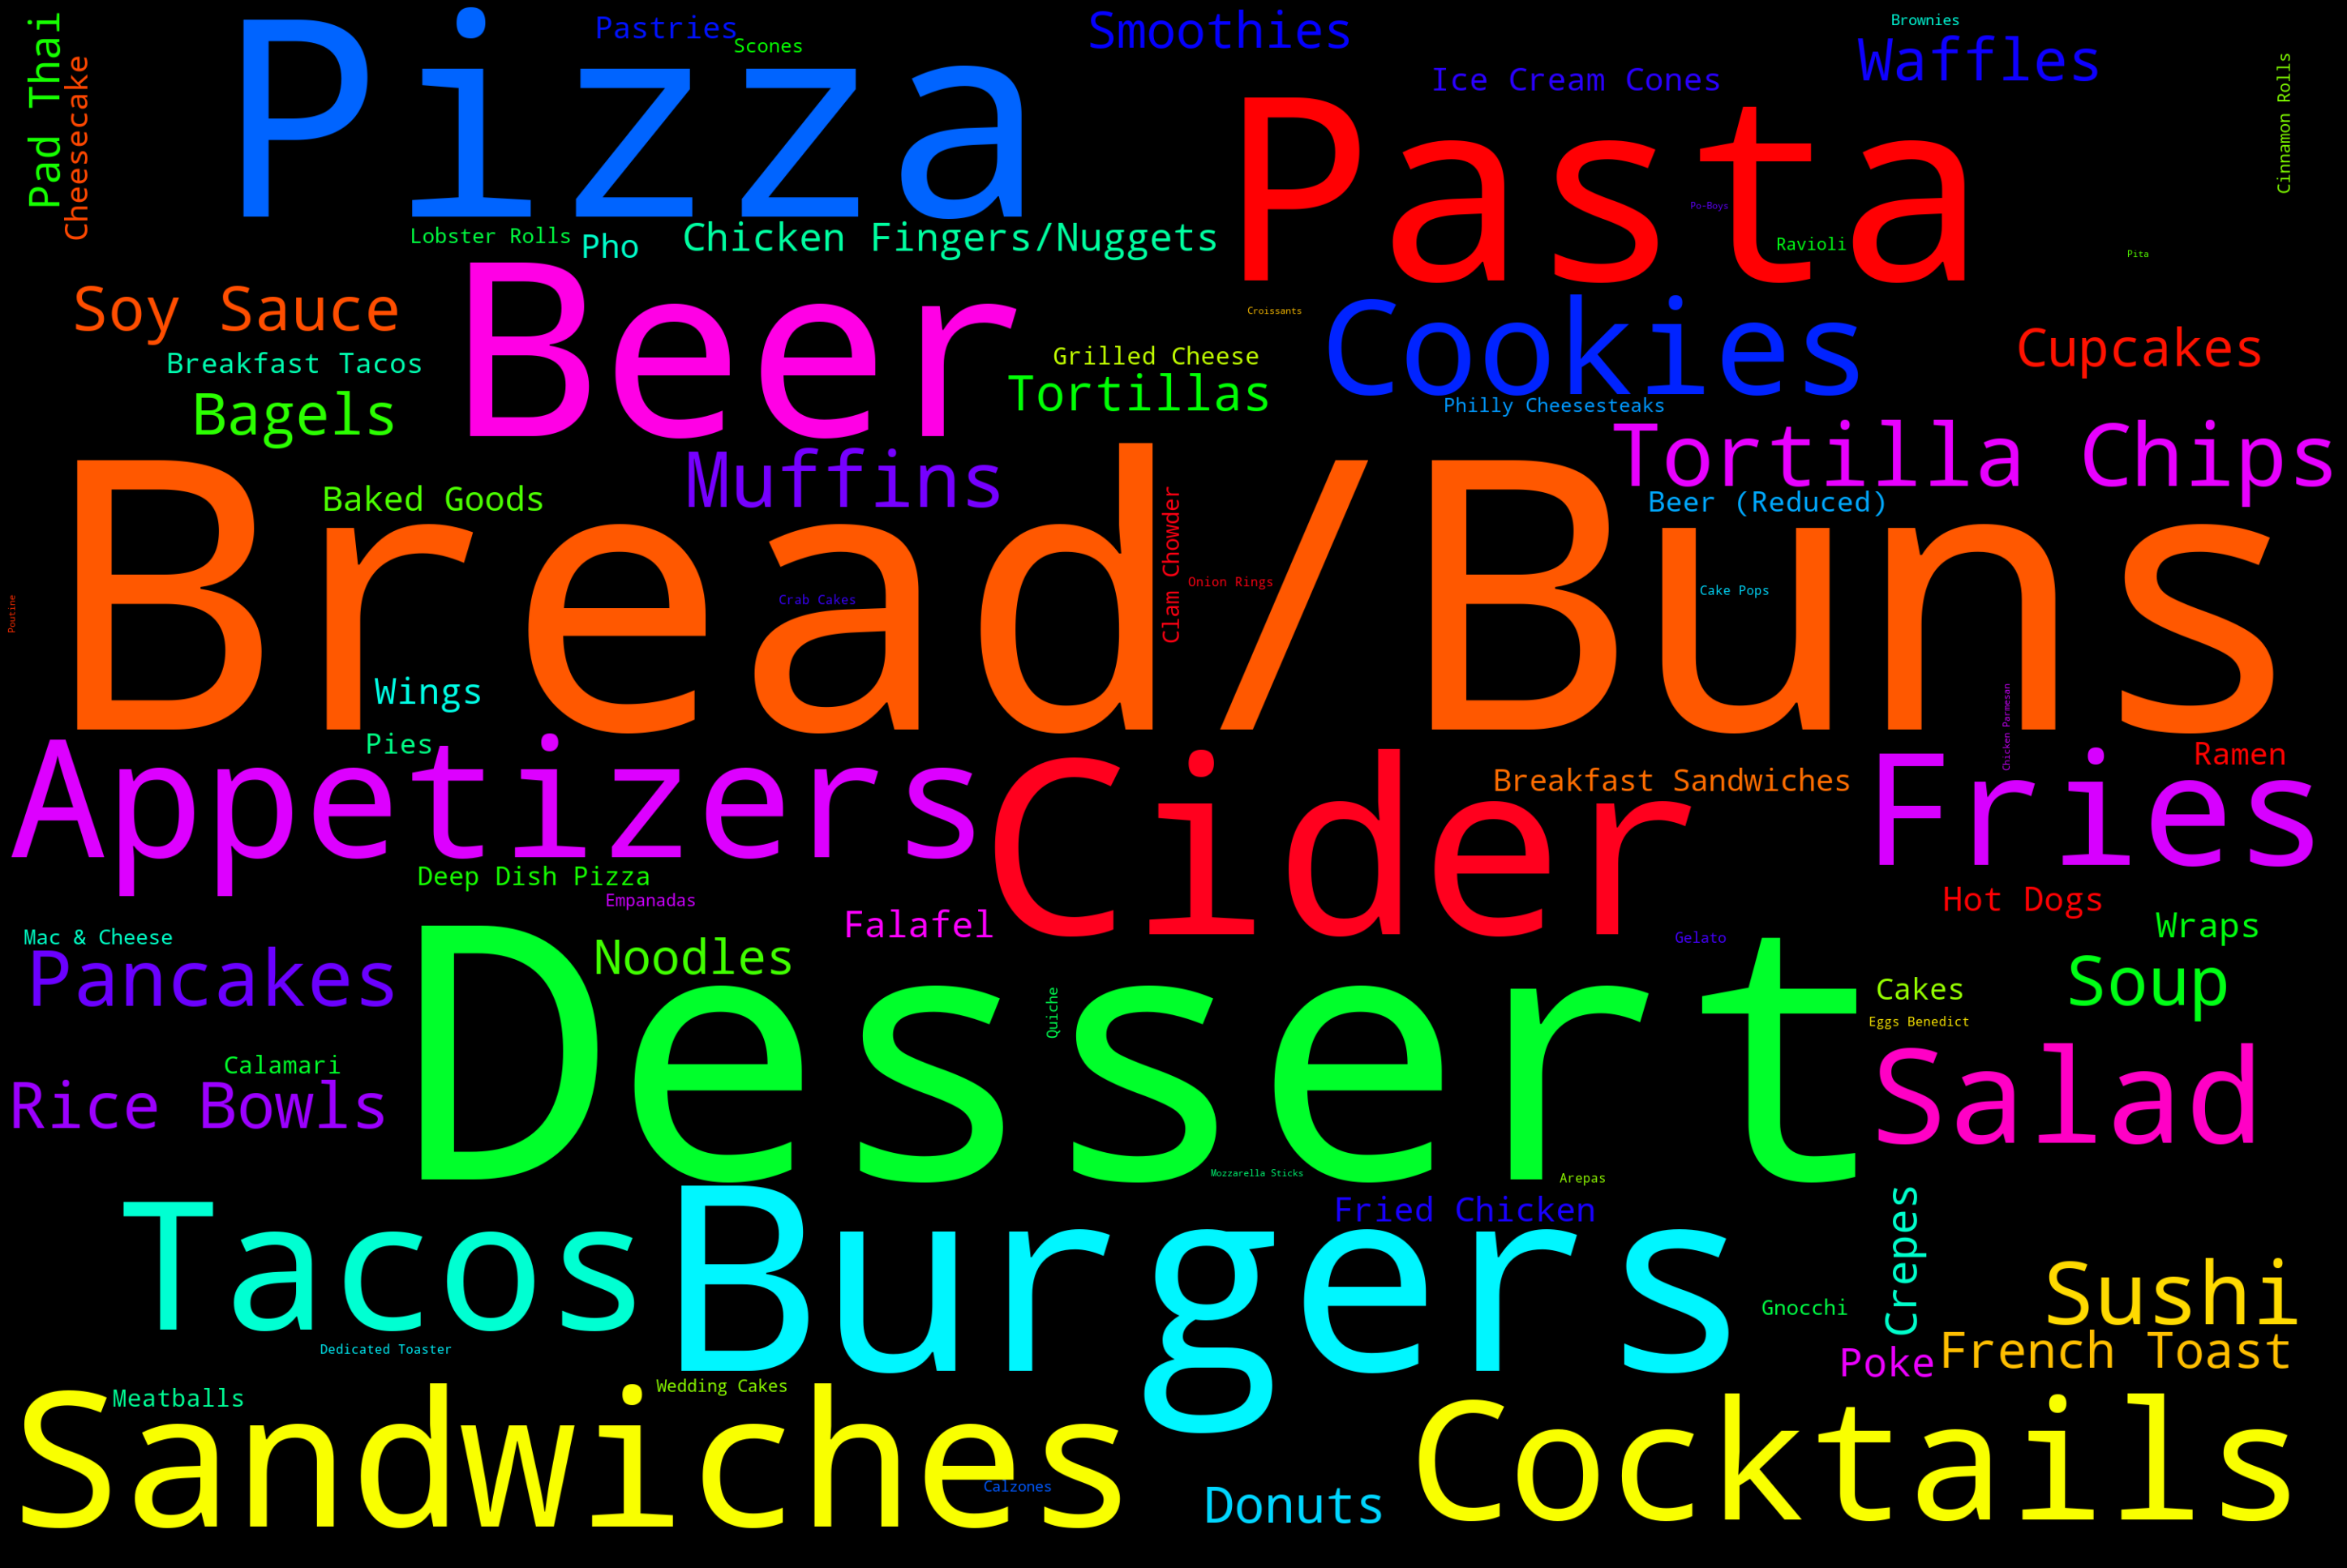

In [13]:
# Creating a WordCloud of most popular food tags
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter

# Creating a function to separate unique strings (not words) from a list
def chain_list(nested_list):
    unnested_list = []
    for sublist in nested_list:
        unnested_list += sublist
    return unnested_list

# Creates a list of all food tag strings across all restaurants 
# so they can be analyzed for frequency in the WordCloud
gf_food = chain_list(gf_data.food_tags.str.split(','))

# Removing food tags that are not food-specific
notfood = {'Celiac Friendly','Gluten Free Menu','None Listed','Dedicated Gluten Free Facility',\
       'Allergen List','Dedicated Kitchen Space','Dedicated Fryer'}
gf_food = [i for i in gf_food if i not in notfood]

# Creating WordCloud / PhraseCloud of food tags
word_cloud_dict = Counter(gf_food)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    colormap = "gist_rainbow",
    random_state = 1,
    stopwords = STOPWORDS).generate_from_frequencies(word_cloud_dict)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show() 

# Building an Aggregate Summary Stats Database by Metro

In [106]:
# Creating DataFrame Grouping Summary Data by Metro Area
gf_databymetro = gf_data.groupby('metro')

# Creating list of metro areas (alphabetical)
gf_metro_list = gf_databymetro.size().index.tolist()

# Creating array of number of restaurant entries per metro
gf_databymetro.size().to_csv('gf_metro_list.csv', header = False)
gf_databymetro_size = gf_databymetro.size()

# Creating joined aggregate dataset of tags and metro areas
gf_metro_only = gf_data.loc[:, gf_data.columns.isin(['metro'])]
gf_all_w_metro = pd.merge(gf_metro_only, gf_all_tags, how='outer',on='name')

# Grouping by Metro and aggregating sum and mean (mean is percentage of restaurants in metro)
gf_all_metro = gf_all_w_metro.groupby('metro') 
gf_all_metro_stats = gf_all_metro.agg(['sum','mean'])  

In [107]:
# Creating a list of non-rankable features to drop
droplist = ['address', 'avg_rating', 'business_url', 'rest_tags', 'city',
       'dedicated_fryer', 'dedicated_gf', 'food_tags', 'gf_menu',
       'how_expensive', 'num_ratings', 'num_reviews', 'page_url', 'phone',
       'review_rating', 'review_text', 'reviewer_name', 'state',
       'total_celiac_friendly', 'total_not_celiac_friendly',
       'total_reviewers_celiac', 'zipcode', 'perc_users_celiac',
       'perc_rest_celiac_friendly', 'perc_rest_celiac_unfriendly',
       'perc_diff_celiac_friendliness', 'avg_rev_rating', 'rev_rating_diff',
       'review_perc_1', 'review_perc_2', 'review_perc_3', 'review_perc_4',
       'review_perc_5']

# Creating a function to rank features biggest to smallest in a dataframe by metro area
def GF_Rank(df, list_, num_=None):
    col_perc = pd.DataFrame(df.drop(droplist, axis=1).groupby('metro').agg(['mean']).loc[list_[0]].sort_values(ascending = False)[:num_])
    col_rank = col_perc.rank(ascending=False, method='min').reset_index().drop(['level_1'], axis=1)
    for lis_ in list_[1:]:
        col_perc_next = pd.DataFrame(df.drop(droplist, axis=1).groupby('metro').agg(['mean']).loc[lis_].sort_values(ascending = False)[:num_])
        col_rank_next = col_perc_next.rank(ascending=False, method='min').reset_index().drop(['level_1'], axis=1)
        col_rank = pd.merge(col_rank, col_rank_next, how='outer', on='level_0')
    return col_rank


# Adding overall tag ranks by metro to all tags (ranked by metro)
gf_all_tags_no = GF_Rank(gf_data_all_tags, gf_metro_list).set_index('level_0').transpose()
for col in gf_all_tags_no.columns:
    gf_all_metro_stats.loc[:,(col,'rank')] = gf_all_tags_no[col]

# Adding restaurant tag ranks by metro to restaruant tags (ranked by metro)
gf_rest_tags_ranked_no = GF_Rank(gf_data_rest_tags, gf_metro_list).set_index('level_0').transpose()
for col in gf_rest_tags_ranked_no.columns:
    gf_all_metro_stats.loc[:,(col,'rest_tags_rank')] = gf_rest_tags_ranked_no[col]
    
# Adding food tag ranks by metro to food tags (ranked by metro)
gf_food_tags_ranked_no = GF_Rank(gf_data_food_tags, gf_metro_list).set_index('level_0').transpose()
for col in gf_food_tags_ranked_no.columns:
    gf_all_metro_stats.loc[:,(col,'food_tags_rank')] = gf_food_tags_ranked_no[col]

# Resorting so new sub-features are in order
gf_all_metro_stats.sort_index(axis=1, inplace=True)

# Grouping non-tag data by metro and aggregating median, mean, and sum
gf_base_stats_metro = gf_data.groupby(['metro']).agg(['median', 'mean', 'sum'])

# Joining non-tag and tag aggregates by metro together and dropping medians for binary features
gf_full_stats_metro = pd.concat([gf_base_stats_metro, gf_all_metro_stats], axis=1)
gf_full_stats_metro = gf_full_stats_metro.drop(('dedicated_fryer','median'), axis=1)
gf_full_stats_metro = gf_full_stats_metro.drop(('dedicated_gf','median'), axis=1)
gf_full_stats_metro = gf_full_stats_metro.drop(('gf_menu','median'), axis=1)

# Adding total number of restaurants by metro to beginning of dataframe
gf_databymetro_size_df = pd.DataFrame(data=gf_databymetro_size, columns = ['num_rests']).groupby('metro').agg(['sum'])
gf_full_stats_metro = pd.concat([gf_databymetro_size_df, gf_full_stats_metro], axis=1)

# Scaling Cost by 5x^2 function to convert mean 1-4 star rating into expected $$ cost (Yelp system)
# How Expensive --> Sum will describe how total amount of money one expects to spend - more useful 
cost_list = round(5*gf_full_stats_metro['how_expensive']['mean']**2,2)
gf_full_stats_metro.loc[:,('how_expensive','sum')] = cost_list

# Final aggregate database by metro area for all features and tags
gf_full_stats_metro

num_rests avg_rating                   dedicated_fryer      \
                    sum     median      mean     sum            mean sum   
metro                                                                      
Austin              281       4.50  3.966192  1114.5        0.049822  14   
Boston              168       4.50  4.056548   681.5        0.047619   8   
Chicago             628       4.50  4.152070  2607.5        0.076433  48   
Denver              413       4.50  3.964891  1637.5        0.053269  22   
Houston              52       4.75  4.182692   217.5        0.057692   3   
Las Vegas            62       4.50  4.556452   282.5        0.048387   3   
Los Angeles         151       4.50  4.036424   609.5        0.039735   6   
Minneapolis         107       4.00  3.827103   409.5        0.037383   4   
Nashville            90       4.00  4.088889   368.0        0.077778   7   
New Orleans          71       4.50  4.204225   298.5        0.056338   4   
New York            519       4.50  4.155106  2156.5        0.053950  28   
Philadelphia        238       4.50  4.216387  1003.5        0.054622  13   
Portland            274       4.50  3.552920   973.5        0.047445  13   
San Antonio          50       4.00  4.000000   200.0        0.040000   2   
San Diego           396       4.25  4.003788  1585.5        0.027778  11   
San Francisco       415       4.00  3.965060  1645.5        0.048193  20   
Seattle             107       4.50  4.313084   461.5        0.065421   7   
Washington DC        51       4.00  4.000000   204.0        0.039216   2   

              dedicated_gf       gf_menu      how_expensive                   \
                      mean sum      mean  sum        median      mean    sum   
metro                                                                          
Austin            0.021352   6  0.466192  131             2  1.669039  13.93   
Boston            0.023810   4  0.511905   86             2  1.940476  18.83   
Chicago           0.012739   8  0.447452  281             2  1.839172  16.91   
Denver            0.024213  10  0.537530  222             2  1.721550  14.82   
Houston           0.038462   2  0.500000   26             2  1.807692  16.34   
Las Vegas         0.000000   0  0.532258   33             2  2.483871  30.85   
Los Angeles       0.059603   9  0.410596   62             2  1.794702  16.10   
Minneapolis       0.009346   1  0.635514   68             2  1.859813  17.29   
Nashville         0.000000   0  0.488889   44             2  2.011111  20.22   
New Orleans       0.000000   0  0.450704   32             2  2.225352  24.76   
New York          0.023121  12  0.493256  256             2  1.996146  19.92   
Philadelphia      0.033613   8  0.399160   95             2  1.844538  17.01   
Portland          0.062044  17  0.492701  135             1  1.518248  11.53   
San Antonio       0.020000   1  0.480000   24             2  2.100000  22.05   
San Diego         0.020202   8  0.555556  220             2  1.765152  15.58   
San Francisco     0.026506  11  0.419277  174             2  1.816867  16.51   
Seattle           0.009346   1  0.392523   42             2  1.925234  18.53   
Washington DC     0.000000   0  0.411765   21             2  2.078431  21.60   

              num_ratings                  num_reviews                   \
                   median       mean   sum      median       mean   sum   
metro                                                                     
Austin                3.0   5.804270  1631         6.0  17.537367  4928   
Boston                4.0  10.285714  1728         5.0  18.458333  3101   
Chicago               2.0   6.044586  3796         3.0  13.332803  8373   
Denver                3.0   6.358354  2626         5.0  17.491525  7224   
Houston               2.5   4.250000   221         4.5  15.846154   824   
Las Vegas            16.0  29.129032  1806        18.0  29.822581  1849   
Los Angeles           2.0   4.827815   729         4.0  16.38

# What does the Gluten Free Dining Experience Look Like in Different Metro Areas?

C:\Users\gottl\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\gottl\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


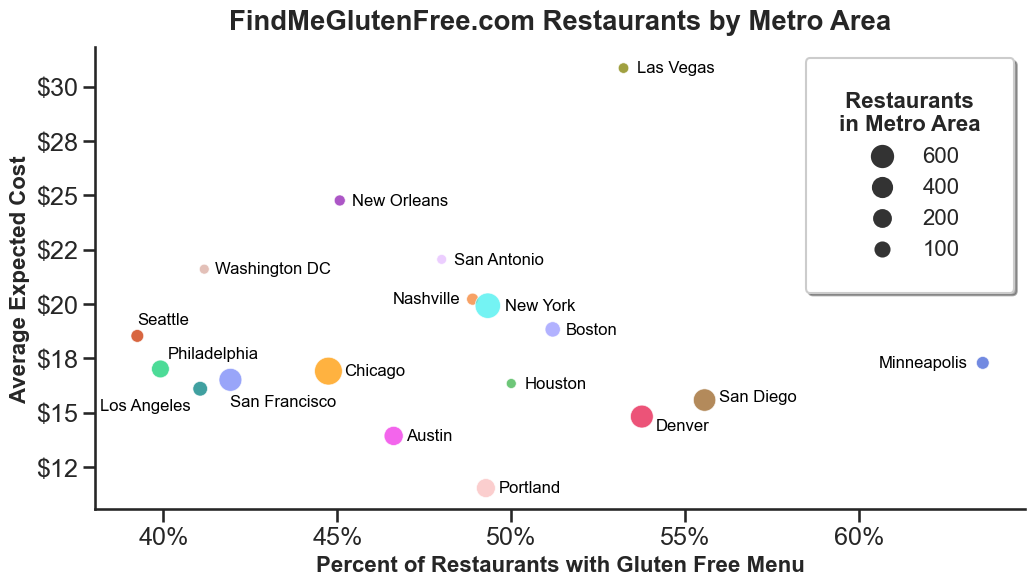

In [117]:
# Creating bubble plot of different metros' costs, celiac friendliness, and number of restaurants
import seaborn as sns
import matplotlib.ticker as ticker

# Size & styles
plt.figure(figsize=(12,6))
sns.set_context("talk", font_scale=1.1)
sns.set_style("ticks")

# Graphing parameters
x = gf_full_stats_metro.loc[:,('gf_menu','mean')]
y = gf_full_stats_metro.loc[:,('how_expensive','sum')]
colors = ['#f032e6', '#9999ff','#ff9900','#e6194b', '#3cb44b', '#808000', '#008080', '#4363d8',\
          '#f58231', '#911eb4', '#46f0f0', '#10d075', '#fabebe','#e6beff',\
          '#9a6324', '#7787f8', '#cc3300', '#daaba1']
area = gf_full_stats_metro.loc[:,('num_rests','sum')]
labels = gf_full_stats_metro.index
sns.set_palette(colors)

ax = sns.scatterplot(x, y, size=area, sizes=(50,400), hue=labels, alpha=0.75)


# Offsetting metro name text to not overlap
xmult = [1.0075,1.0075,1.01,1.0075,1.0075,1.0075,.93,.953,.953,1.0075,1.01,1.005,1.0075,1.0075,1.0075,1,1,1.0075]
ymult = [1,0.998,1,0.97,1,1,0.95,1,1,1,1,1.04,1,1,1.01,0.94,1.04,1]
for line in range(0,gf_full_stats_metro.shape[0]):
     texts = [ax.text(x[line]*xmult[line], y[line]*ymult[line], gf_full_stats_metro.index[line], horizontalalignment='left', 
     size=12, color='black', ha='left', va='center')]

# Customizing titles and axis text formatting ($, %)        
plt.title('FindMeGlutenFree.com Restaurants by Metro Area', y=1.02, fontweight='bold')
plt.ylabel('Average Expected Cost', size=16, fontweight='bold')
plt.xlabel('Percent of Restaurants with Gluten Free Menu', size=16, fontweight='bold')
xvals = ax.get_xticks()
yvals = ax.get_yticks()
ax.set_xticklabels(['{:,.0%}'.format(x) for x in xvals])
formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

# Creating legend for area size
h,l = ax.get_legend_handles_labels()
size_lgd = plt.legend(h[-5:-1][::-1], l[-5:-1][::-1], loc='upper right', borderpad=1.5, prop={'size': 16},
                     markerscale = 0.9, fancybox = True, shadow=True,
                      title=' Restaurants\nin Metro Area')
plt.setp(size_lgd.get_title(),fontsize=16, fontweight = 'bold')
new_labels = [600,400,200,100]
for t, l in zip(size_lgd.texts, new_labels): t.set_text(l)
    
# Get rid of top and right axes and display 
sns.despine()
plt.show()

# Restore matplotlib graphing defaults
plt.rcdefaults()

# What Percentage of Restaurants are Dedicated Gluten Free?

In [144]:
dedicated_gf_perc = gf_full_stats_metro.loc[:,('dedicated_gf','mean')].sort_values(ascending=False)
dedicated_gf_perc = dedicated_gf_perc.apply(lambda x: str(round(100*x,1))+"%")
print('Percentage of Restaurants that are a Dedicated Gluten Free Facility, by Metro:\n')
print(dedicated_gf_perc)

Percentage of Restaurants that are a Dedicated Gluten Free Facility, by Metro:

metro
Portland         6.2%
Los Angeles      6.0%
Houston          3.8%
Philadelphia     3.4%
San Francisco    2.7%
Denver           2.4%
Boston           2.4%
New York         2.3%
Austin           2.1%
San Diego        2.0%
San Antonio      2.0%
Chicago          1.3%
Seattle          0.9%
Minneapolis      0.9%
New Orleans      0.0%
Nashville        0.0%
Las Vegas        0.0%
Washington DC    0.0%
Name: (dedicated_gf, mean), dtype: object


# Which Metro Areas have the Best-Reviewed Gluten Free Restaurants? (Visualization #1)

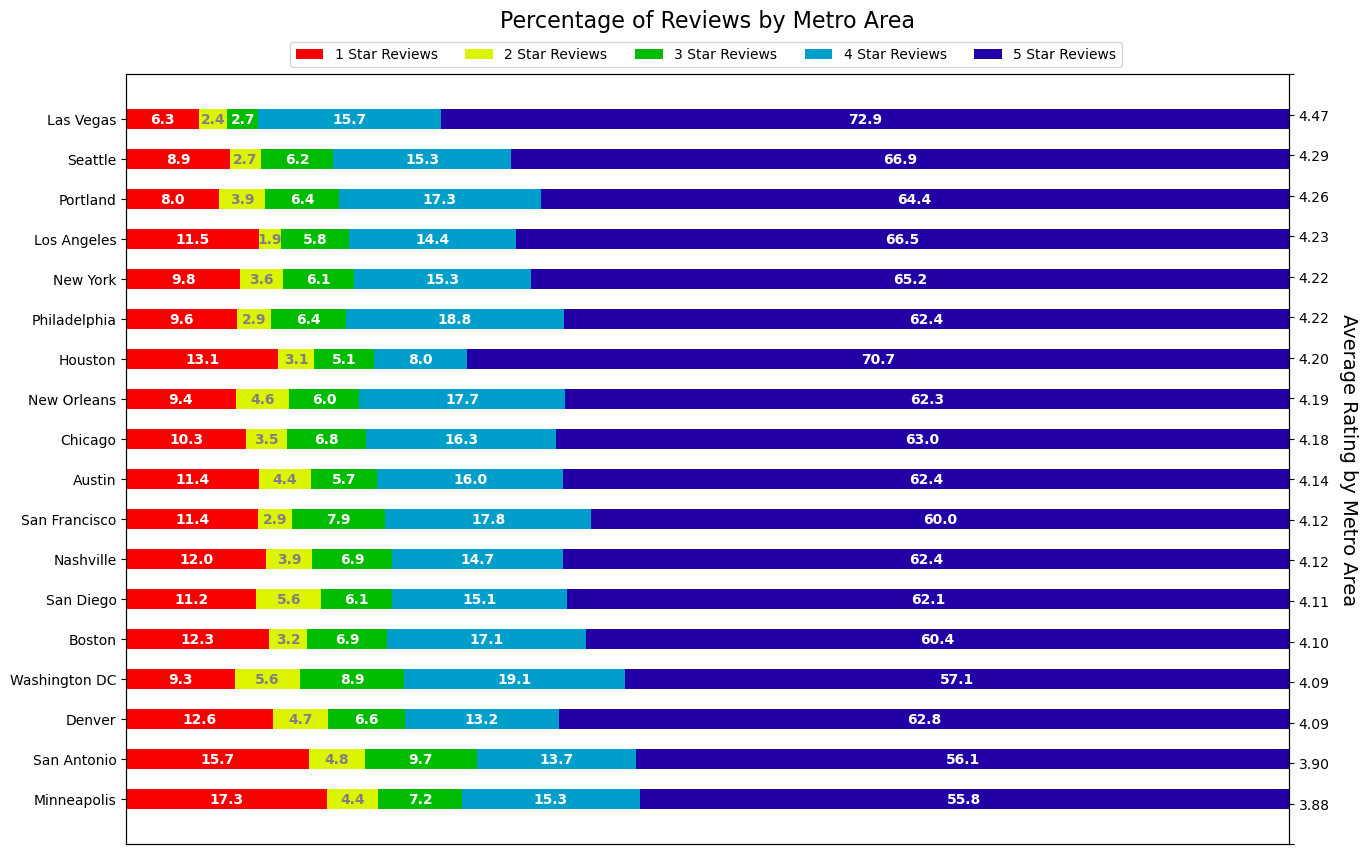

In [146]:
#### Creating scaled visualization of rating distribution and average by metro area ####
# Creating dictionary of metro to percentage for each rating
rev_lis = ['review_perc_1','review_perc_2','review_perc_3','review_perc_4','review_perc_5']
gf_full_stats_metro_rev_order = gf_full_stats_metro['avg_rev_rating']['mean'].sort_values(ascending=False)
gf_full_stats_metro_rev_order

gf_full_stats_metro_rev_order = gf_full_stats_metro['avg_rev_rating']['mean'].sort_values(ascending=False)
metros = list(gf_full_stats_metro_rev_order.index)
sums = {}
sum_results = {}
rev_dist_results = {}

for metro in metros:
    sum_lis = []
    for col in rev_lis:
        sum_lis.append(gf_full_stats_metro.loc[metro][col]['sum'])
        sum_results[metro] = sum_lis
    sums[metro] = round((sum(sum_results[metro])),0)

for metro in metros:
    rev_perc_lis = []
    for col in rev_lis:
        rev_perc_lis.append(100*gf_full_stats_metro.loc[metro][col]['sum']/sums[metro])
        rev_dist_results[metro] = rev_perc_lis

category_names = ['1 Star Reviews','2 Star Reviews','3 Star Reviews','4 Star Reviews','5 Star Reviews']

avg_rating = ['','']
for metro in list(gf_full_stats_metro_rev_order.index):
    ele = gf_full_stats_metro['avg_rev_rating']['mean'].loc[metro]
    ele = '{:.2f}'.format(round(ele, 2))
    avg_rating.insert(1, ele)

# Create plotting function
def survey(rev_dist_results, category_names):
    labels = list(rev_dist_results.keys())
    data = np.array(list(rev_dist_results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('nipy_spectral')(np.linspace(0.14, 0.86, data.shape[1]))
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

# Set bar data, positions, and colors
    for i, (colname, color) in enumerate(zip(category_names, category_colors[::-1])):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r + g + b < 1.5 else 'gray'
        
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(round(c, 1)), ha='center', va='center',
                    color=text_color, fontweight='bold')

# Top legend and second y axis with average rating review            
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.135, 1),
              loc='lower left', fontsize='medium')
    secaxy = ax.twinx()
    secaxy.set_yticks((range(20)))
    secaxy.set_yticklabels(avg_rating)
    secaxy.set_ylabel('Average Rating by Metro Area', rotation=-90, fontsize=14)#, rotation_mode='default', y=.59)
    secaxy.yaxis.set_label_coords(1.06,0.5)
    return fig, ax

# Plot Visualization
survey(rev_dist_results, category_names)
plt.title("Percentage of Reviews by Metro Area", y=1.05, fontsize=16)
plt.show()

# Which Metros Have the Most Celiac-Friendly Restaurants?

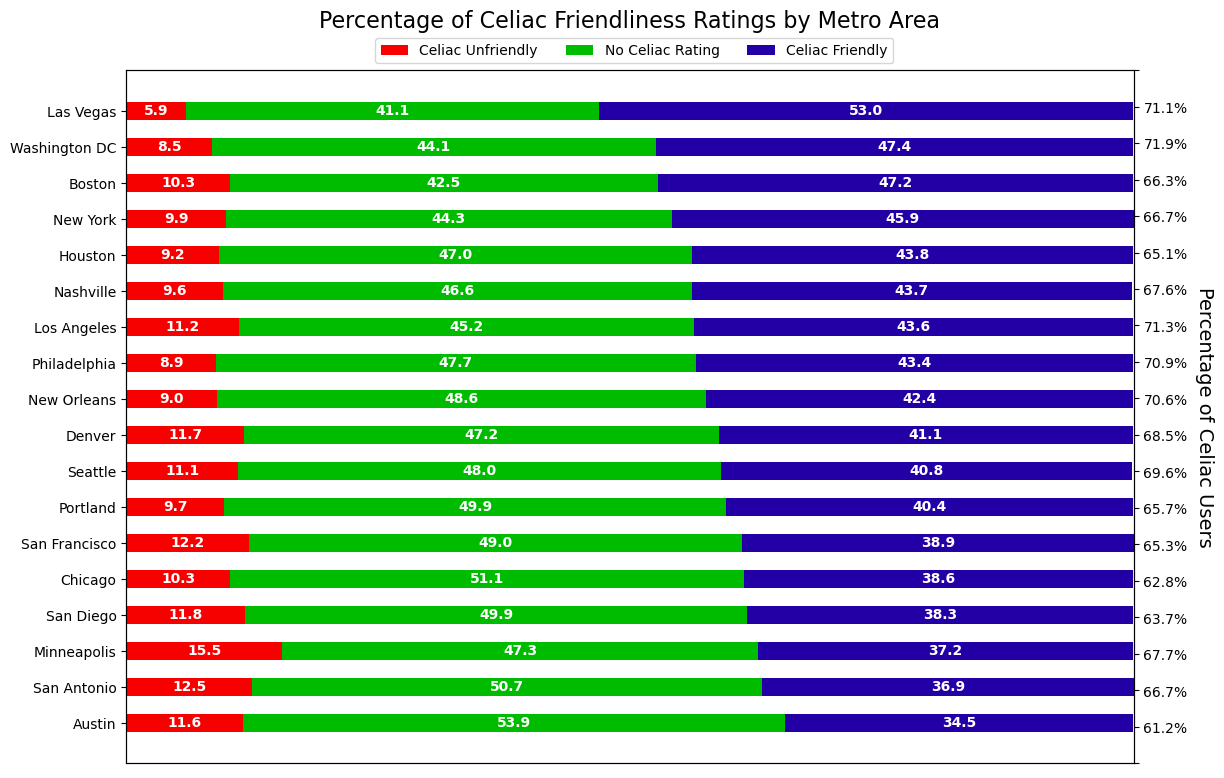

In [150]:
#### Creating scaled visualization of rating distribution and average by metro area ####
# Creating dictionary of metro to percentage for each rating
gf_full_stats_metro.loc[:,('perc_no_celiac_friendliness','mean')] = 1-gf_full_stats_metro['perc_rest_celiac_friendly']['mean']-gf_full_stats_metro['perc_rest_celiac_unfriendly']['mean']
rev_lis = ['perc_rest_celiac_unfriendly','perc_no_celiac_friendliness','perc_rest_celiac_friendly']

gf_full_stats_metro_celiac_order = gf_full_stats_metro['perc_rest_celiac_friendly']['mean'].sort_values(ascending=False)
metros = list(gf_full_stats_metro_celiac_order.index)
sums = {}
sum_results = {}
celiac_dist_results = {}

for metro in metros:
    celiac_perc_lis = []
    for col in rev_lis:
        celiac_perc_lis.append(round(100*gf_full_stats_metro.loc[metro][col]['mean'],1))
        celiac_dist_results[metro] = celiac_perc_lis
            
category_names = ['Celiac Unfriendly','No Celiac Rating','Celiac Friendly']

celiac_perc = ['','']
for metro in list(gf_full_stats_metro_celiac_order.index):
    ele = gf_full_stats_metro['perc_users_celiac']['mean'].loc[metro]
    ele = '{:.1f}%'.format(100*round(ele, 3))
    celiac_perc.insert(1, ele)

# Create plotting function
def survey(rev_dist_results, category_names):
    labels = list(rev_dist_results.keys())
    data = np.array(list(rev_dist_results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('nipy_spectral')(np.linspace(0.14, 0.86, data.shape[1]))
    fig, ax = plt.subplots(figsize=(13, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

# Set bar data, positions, and colors
    for i, (colname, color) in enumerate(zip(category_names, category_colors[::-1])):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r + g + b < 1.5 else 'gray'
        
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(round(c, 1)), ha='center', va='center',
                    color=text_color, fontweight='bold')

# # Top legend and second y axis with average rating review            
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0.24, 1),
              loc='lower left', fontsize='medium')
    secaxy = ax.twinx()
    secaxy.set_yticks((range(20)))
    secaxy.set_yticklabels(celiac_perc)
    secaxy.set_ylabel('Percentage of Celiac Users', rotation=-90, fontsize=14)#, rotation_mode='default', y=.59)
    secaxy.yaxis.set_label_coords(1.08,0.5)
    return fig, ax

# Plot Visualization
survey(celiac_dist_results, category_names)
plt.title("Percentage of Celiac Friendliness Ratings by Metro Area", y=1.05, fontsize=16)
plt.show()

# What Types of Gluten Free Food are Most Popular in each Metro Area?

In [151]:
#### Table with Top 10 Restaurant Types by Metro, with matching colors for tags #####
gf_rest_rank_10_final = pd.DataFrame(data = range(1,11), columns = ['Rest Tag Rank'])
for i in range(0,gf_rest_tags_ranked_no.shape[0]):
    metroname = gf_rest_tags_ranked_no.iloc[i].transpose().name # Column name of that city
    rest_rank_10 = gf_rest_tags_ranked_no.iloc[i].transpose().sort_values()[:11].index
    gf_rest_rank_10 = pd.DataFrame(rest_rank_10)
    gf_rest_rank_10.columns = [metroname]
    gf_rest_rank_10_final[metroname] = gf_rest_rank_10
gf_rest_rank_10_final.set_index("Rest Tag Rank", inplace=True)
gf_rest_rank_10_final

column_rest_values = gf_rest_rank_10_final[gf_metro_list].values.ravel()
unique_values =  pd.unique(column_rest_values)
unique_values

colors = ['#ff9900','#9999ff','#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231',\
          '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff',\
          '#9a6324', '#fffac8', '#cc3300', '#aaffc3', '#808000', '#ffd8b1', '#10d075',\
          '#808080', '#ffffff', '#000000']

def color_value(val):
    for value in unique_values:
        for i in range(0, len(unique_values)):
            if unique_values[i] in val:
                color = colors[i]
                break
            else:
                color = 'black'
    return 'background-color: %s' % color

gf_rest_rank_10_color = gf_rest_rank_10_final.style.applymap(color_value)
gf_rest_rank_10_color

,Austin,Boston,Chicago,Denver,Houston,Las Vegas,Los Angeles,Minneapolis,Nashville,New Orleans,New York,Philadelphia,Portland,San Antonio,San Diego,San Francisco,Seattle,Washington DC
Rest Tag Rank,,,,,,,,,,,,,,,,,,
1,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant,Lunch,Restaurant,Restaurant,Restaurant,Restaurant,Restaurant
2,Lunch,Late Night,Late Night,Lunch,Lunch,Late Night,Lunch,Lunch,Late Night,Late Night,Late Night,Lunch,Restaurant,Late Night,Lunch,Lunch,Lunch,Late Night
3,Late Night,Lunch,Lunch,Late Night,Late Night,Lunch,Late Night,Late Night,Lunch,Lunch,Lunch,Late Night,Dairy-Free Friendly,Lunch,Late Night,Dairy-Free Friendly,Late Night,Lunch
4,Takeout,Takeout,Takeout,Takeout,Takeout,Takeout,Dairy-Free Friendly,Takeout,Takeout,Pescetarian Friendly,Takeout,Takeout,Takeout,Dairy-Free Friendly,Takeout,Late Night,Takeout,Takeout
5,Dairy-Free Friendly,Dairy-Free Friendly,Dairy-Free Friendly,Dairy-Free Friendly,Dairy-Free Friendly,Dairy-Free Friendly,Takeout,Dairy-Free Friendly,Dairy-Free Friendly,Seafood,Dairy-Free Friendly,Dairy-Free Friendly,Vegan Friendly,Mexican,Dairy-Free Friendly,Takeout,Dairy-Free Friendly,Dairy-Free Friendly
6,Vegan Friendly,Vegetarian Friendly,Vegetarian Friendly,Vegetarian Friendly,Vegan Friendly,Breakfast,Vegan Friendly,Vegetarian Friendly,Vegan Friendly,Breakfast,Vegan Friendly,Vegan Friendly,Late Night,Breakfast,Vegetarian Friendly,Vegan Friendly,Pescetarian Friendly,Vegan Friendly
7,Breakfast,Pescetarian Friendly,Vegan Friendly,Vegan Friendly,Breakfast,Asian,Vegetarian Friendly,Vegan Friendly,Vegetarian Friendly,Brunch,Breakfast,Vegetarian Friendly,Vegetarian Friendly,Kid Friendly,Vegan Friendly,Vegetarian Friendly,Seafood,Pescetarian Friendly
8,Vegetarian Friendly,Seafood,Breakfast,Breakfast,Brunch,Vegan Friendly,Breakfast,Asian,Bar,Cafe,Vegetarian Friendly,Breakfast,Asian,Steakhouse,Breakfast,Cafe,Vegetarian Friendly,Seafood
9,Keto Friendly,Vegan Friendly,Cafe,Kid Friendly,Vegetarian Friendly,Vegetarian Friendly,Cafe,Pescetarian Friendly,Kid Friendly,Dairy-Free Friendly,Brunch,Cafe,Breakfast,Bar,Kid Friendly,Asian,Asian,Vegetarian Friendly


# At Which Types of Restaurants Should One Expect to Find Celiac-Friendly Food?

In [152]:
#### Data Generation of Percentage Great Restaurants / Celiac Friendly by Tag ####
pd.options.display.max_rows = 40

# Percentage of Restaurants by tags with ratings 4.5 stars or higher
gf_data_all_great = gf_data_all_tags.select_dtypes(exclude=['object', 'bool']).loc[gf_data_all_tags.avg_rev_rating>=4.5]
rest_great_sum = gf_data_all_great.sum()
gf_data_all_notgreat = gf_data_all_tags.select_dtypes(exclude=['object', 'bool']).loc[gf_data_all_tags.avg_rev_rating<4.5]
rest_not_great_sum = gf_data_all_notgreat.sum()
rest_great = pd.DataFrame(gf_data_all_tags.select_dtypes(exclude=['object', 'bool']).sum(), columns=['total_natl_rests'])
rest_great['great_rests'] = rest_great_sum
rest_great['not_great_rests'] = rest_not_great_sum
rest_great['perc_great_rests'] = 100* rest_great['great_rests'] / (rest_great['great_rests']+rest_great['not_great_rests'])
rest_great_min50_sort = rest_great.sort_values(['perc_great_rests'], ascending=False).loc[rest_great.total_natl_rests>=50]
rest_great_min50_sort = rest_great_min50_sort.drop(['rev_rating_diff','avg_rating', 'avg_rev_rating','review_perc_1','review_perc_2','review_perc_3',\
                   'review_perc_4','review_perc_5','perc_users_celiac', 'perc_rest_celiac_friendly', \
                   'perc_rest_celiac_unfriendly','perc_diff_celiac_friendliness', 'num_ratings', 'num_reviews',\
                   'total_celiac_friendly','total_not_celiac_friendly', 'total_reviewers_celiac','how_expensive'])

# Percentage of Restaurants' Celiac Friendliness ratings by tags 
rest_celiac = pd.DataFrame([], columns=['index','rest_celiac_friendly','rest_celiac_not_friendly'])
for i in rest_great_min50_sort.index:
    rest = gf_data_all_tags.select_dtypes(exclude=['object', 'bool']).loc[gf_data_all_tags[i]==1]
    rest_celiac_friendly = rest.total_celiac_friendly.sum()
    rest_not_celiac_friendly = rest.total_not_celiac_friendly.sum()
    natl_celiac_friendliness = pd.DataFrame([[i, rest_celiac_friendly, rest_not_celiac_friendly]], columns = rest_celiac.columns)
    rest_celiac = rest_celiac.append(natl_celiac_friendliness)
rest_celiac['perc_celiac_friendly'] = 100*rest_celiac['rest_celiac_friendly'] / (rest_celiac['rest_celiac_friendly'] + rest_celiac['rest_celiac_not_friendly'])

# Combining the Greatness / Celiac Friendliness data
rest_great_celiac_min50 = pd.merge(rest_great_min50_sort.reset_index(), rest_celiac, how='outer',on='index').set_index('index')
rest_great_celiac_min50['mean_celiac_ratings_per_rest'] = rest_great_celiac_min50['rest_celiac_friendly'] / rest_great_celiac_min50['total_natl_rests']
rest_great_celiac_min50['mean_celiac_friendly'] = rest_great_celiac_min50['perc_celiac_friendly']/100 * rest_great_celiac_min50['mean_celiac_ratings_per_rest']
rest_great_celiac_min50['mean_celiac_not_friendly'] = (1 - rest_great_celiac_min50['perc_celiac_friendly']/100) * rest_great_celiac_min50['mean_celiac_ratings_per_rest']
rest_great_celiac_min50

# Creating a subset for rest tags only, sorted by Greatness
gf_rest_columns = list(gf_rest_tags.columns)
rest_tags_great_celiac_min50 = rest_great_celiac_min50[rest_great_celiac_min50.index.isin(gf_rest_columns)]
rest_tags_great_celiac_min50_sort = rest_tags_great_celiac_min50.sort_values(['perc_great_rests'], ascending=False)

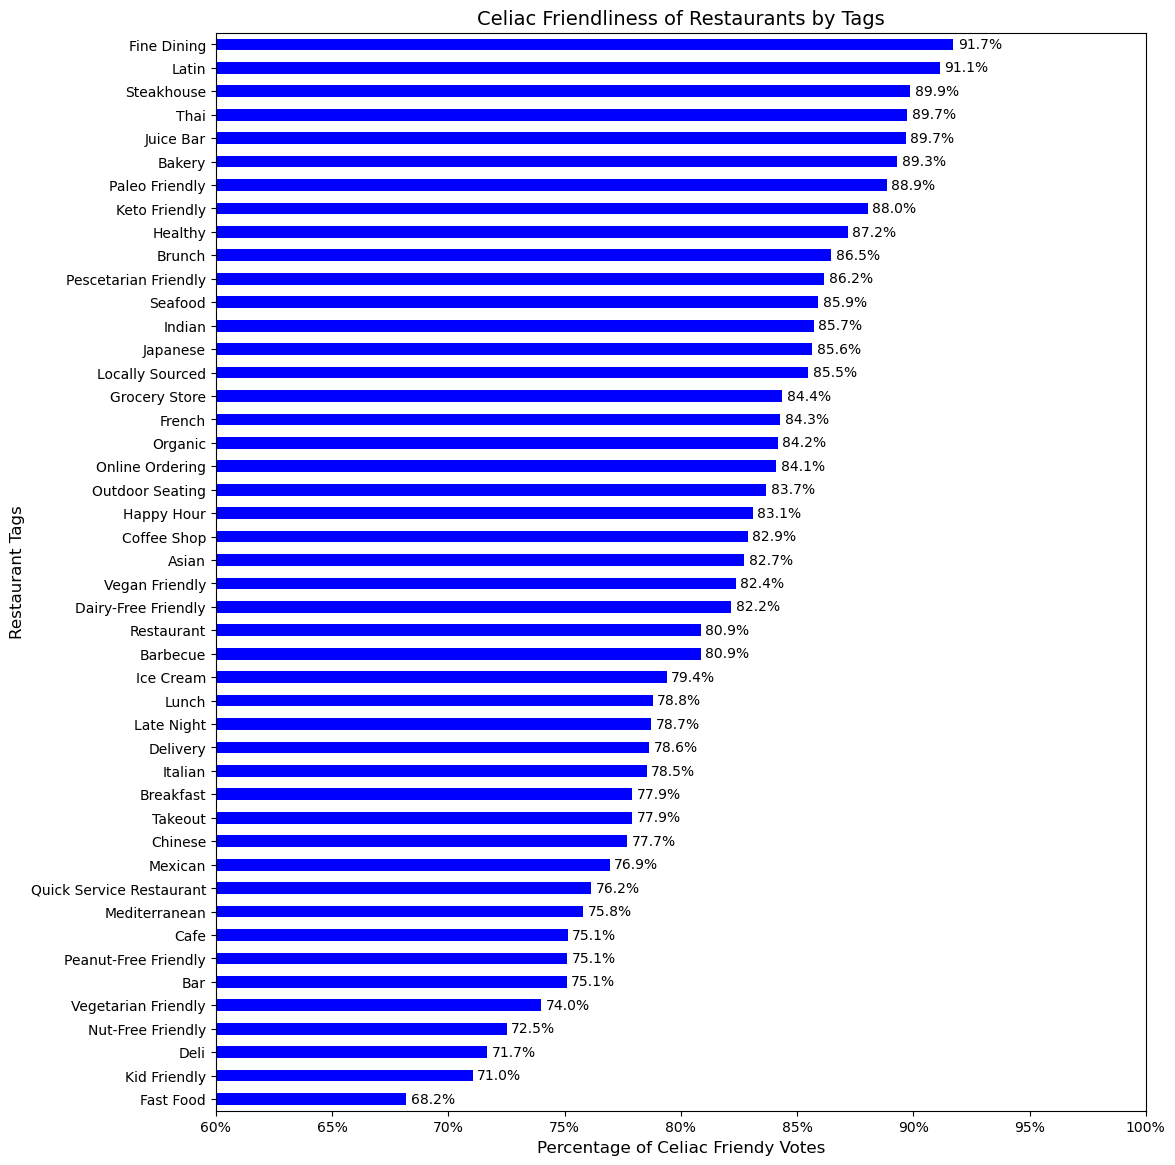

In [153]:
#### Celiac Friendliness Bar Chart by Food Tag ####

# Generating list of Percentage Celiac Friendly for Text next to bars
celiac_perc_lis_order = []
for type_ in list(rest_tags_great_celiac_min50_sort['perc_celiac_friendly'].sort_values().index):
    ele = rest_tags_great_celiac_sort['perc_celiac_friendly'].loc[type_]
    ele = '{:.1f}%'.format(round(ele, 1))
    celiac_perc_lis_order.append(ele)

# Plotting
plt.figure(figsize=(10,12))
ax = rest_tags_great_celiac_min50_sort['perc_celiac_friendly'].sort_values().plot.barh(color="b")
plt.title("Celiac Friendliness of Restaurants by Tags", size=14)
plt.ylabel("Restaurant Tags", size=12)
plt.xlabel("Percentage of Celiac Friendy Votes", size=12)
ax.set_xlim(60, 100)
for i in range(0,len(celiac_perc_lis_order)):
    plt.annotate(
        celiac_perc_lis_order[i],                     
        (ax.patches[i].get_width(), ax.patches[i].get_y() + ax.patches[i].get_height() / 2),      
        xytext=(35, 0),          
        textcoords="offset points",
        va='center',               
        ha='right')
formatter = ticker.FormatStrFormatter('%1.0f%%')
ax.xaxis.set_major_formatter(formatter)

plt.gcf().set_size_inches(12, 14)


# Which Restaurant Type Tags are the Most Popular?

<Figure size 1000x1200 with 0 Axes>

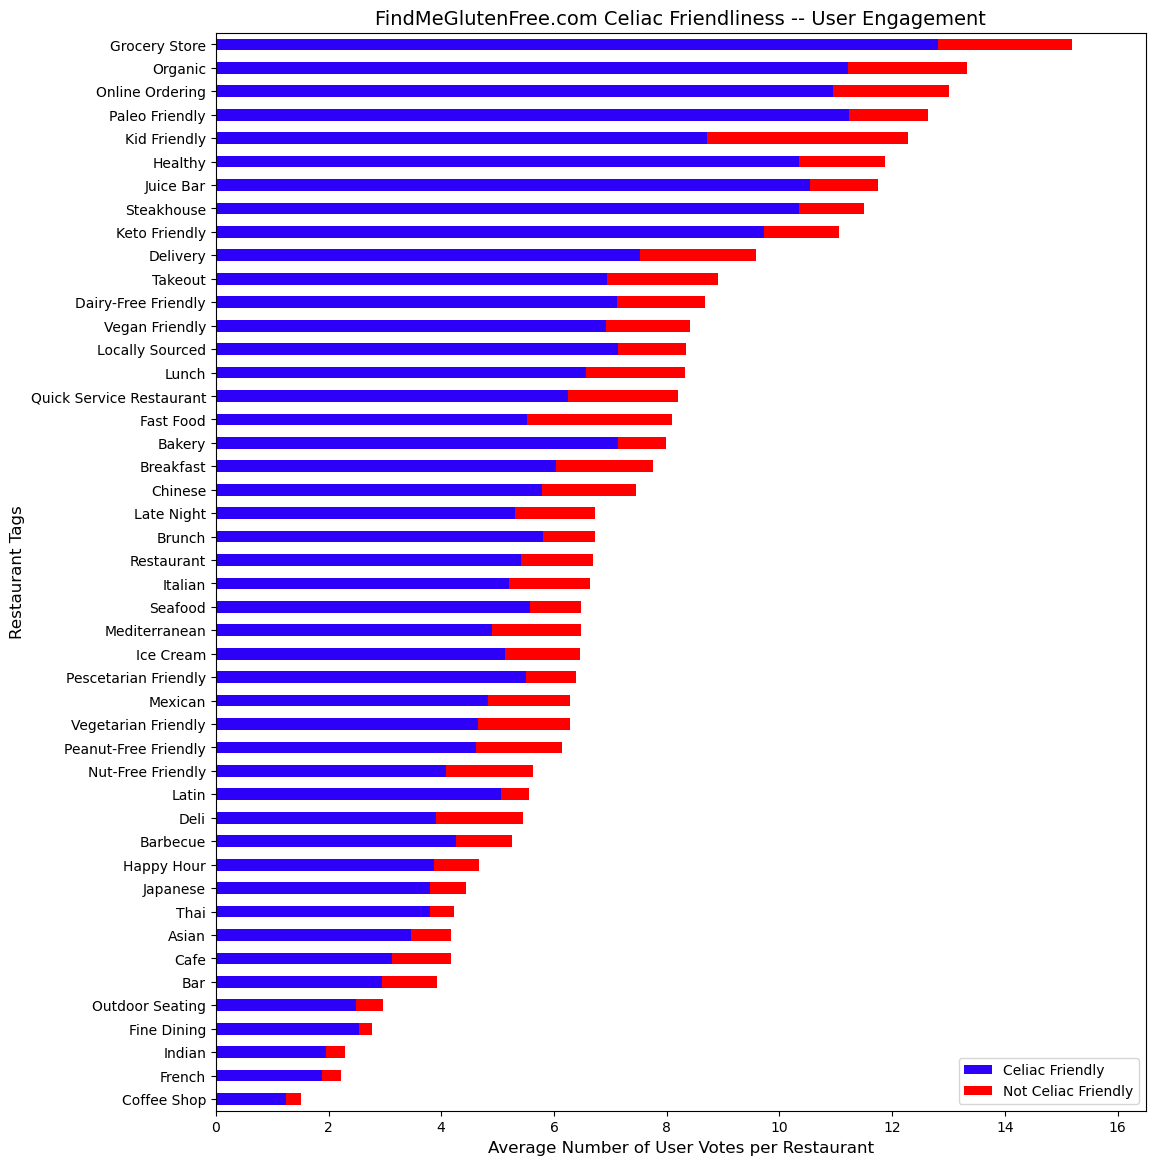

In [154]:
#### Celiac User Engagement Bar Chart by Food Tag ####
rest_tags_great_celiac_sort = rest_tags_great_celiac_min50.sort_values(['mean_celiac_ratings_per_rest'])
rest_tags_just_celiac = rest_tags_great_celiac_sort[['mean_celiac_friendly','mean_celiac_not_friendly']]

plt.figure(figsize=(10,12))
ax = rest_tags_just_celiac.plot.barh(stacked = True, color = ['#2D00F7','red'])#'#F20089'])
plt.title("FindMeGlutenFree.com Celiac Friendliness -- User Engagement", size=14)
plt.ylabel("Restaurant Tags", size=12)
plt.xlabel("Average Number of User Votes per Restaurant", size=12)
ax.set_xlim(0, 16.5)
ax.legend(["Celiac Friendly", "Not Celiac Friendly"]);
plt.gcf().set_size_inches(12, 14)

# Which Metro Areas have the Best-Reviewed Gluten Free Restaurants? (Visualization #2)

C:\Users\gottl\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(close=None, block=None)>

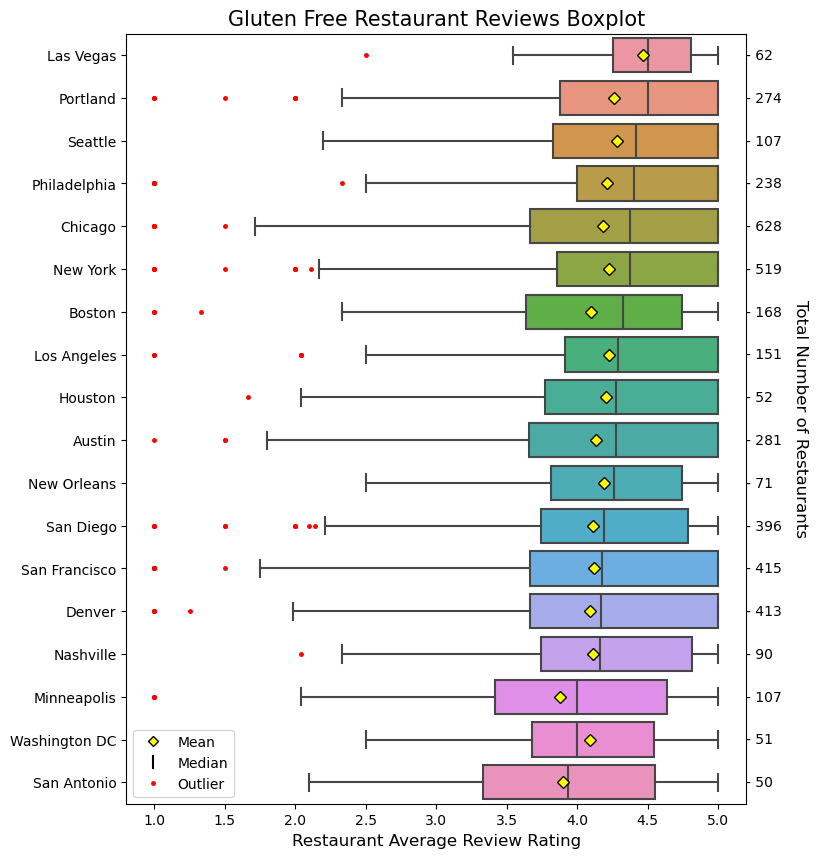

In [159]:
from matplotlib.lines import Line2D

plt.figure(figsize=(8,10))

gf_data_rev_ordered_median = round(gf_full_stats_metro.loc[:,('avg_rev_rating','median')].sort_values(ascending = False),2)
gf_data_rev_ordered_median_index = gf_data_rev_ordered_median.index
gf_data_rests_ordered = []
for city in gf_data_rev_ordered_median_index:
    ele = gf_full_stats_metro.loc[[city],('num_rests','sum')][0]
    gf_data_rests_ordered.append(ele)

x = gf_data['avg_rev_rating']
y = gf_data['metro']
red_circle = dict(markerfacecolor='r', marker='o', markeredgecolor='r', markersize=2.5)
yellow_diamond = dict(markerfacecolor='yellow', markeredgecolor='black', marker='D', markersize=6)

ax = sns.boxplot(x,y, 
                 order=gf_data_rev_ordered_median_index, 
                 flierprops=red_circle, showmeans=True, meanprops=yellow_diamond)

plt.title("Gluten Free Restaurant Reviews Boxplot", size=15)
ax.set_xlabel('Restaurant Average Review Rating', fontsize=12)
ax.set_ylabel('Total Number of Restaurants', rotation=-90, fontsize=12)
ax.yaxis.set_label_coords(1.075,0.5)

nobs = gf_data_rests_ordered
nobs = [str(x) for x in nobs]
nobs = ["- " + i for i in nobs] 
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(5.20,tick+0.1,nobs[tick],color='black')
legend_elements = [Line2D([0], [0], marker='o', color='red', markeredgecolor='r', markersize=2.5, label='Outlier',
                         linestyle = 'None'),
                   Line2D([1], [1], color='black', lw=2, label='Median', marker='|',
                         linestyle='None',
                          markersize=10, markeredgewidth=1.5,),
                   Line2D([0], [0], marker='D', color='yellow', label='Mean',
                          markerfacecolor='yellow', markeredgecolor='black', markersize=5, linestyle = 'None')]

# Create the figure
plt.legend(handles=legend_elements[::-1], loc='lower left')
plt.show      

# ------------------------------------------------------------

# Extra Analyses Not in Blog Post

# ------------------------------------------------------------

# Are There Any Significant Correlations?

In [166]:
gf_data_num = gf_data_all_tags.select_dtypes(exclude=['object', 'bool'])
avg_rev_corr = gf_data_num.drop(['avg_rating', 'review_perc_1','review_perc_2','review_perc_3','review_perc_4','review_perc_5','total_celiac_friendly','total_not_celiac_friendly'], axis=1).corr()['avg_rev_rating'].sort_values(ascending=False)
print("Average Review Rating is significantly correlated to:")
print(avg_rev_corr[(np.abs(avg_rev_corr)>=0.2)& (avg_rev_corr!=1)])

Average Rating Review is significantly correlated to:
perc_diff_celiac_friendliness    0.623033
perc_rest_celiac_friendly        0.449254
perc_rest_celiac_unfriendly     -0.643884
Name: avg_rev_rating, dtype: float64


In [167]:
how_expensive_corr = gf_data_num.drop(['avg_rating', 'review_perc_1','review_perc_2','review_perc_3','review_perc_4','review_perc_5','total_celiac_friendly','total_not_celiac_friendly'], axis=1).corr()['how_expensive'].sort_values(ascending=False)[:10]
print("How Expensive is significantly correlated to:")
print(how_expensive_corr[(np.abs(how_expensive_corr)>=0.2)& (how_expensive_corr!=1)])

How Expensive is significantly correlated to:
Restaurant              0.432616
Steakhouse              0.331204
Seafood                 0.307125
Pescetarian Friendly    0.296845
Late Night              0.277700
Fine Dining             0.231965
Name: how_expensive, dtype: float64


In [170]:
# Significant Positive Correlation list for all Features and Tags with over 50 nationwide restaurant appearances
over50list = list(gf_data.columns[23:29]) + list(rest_great_celiac_min50.index)
c = gf_data_num.loc[:, gf_data_num.columns.isin(over50list)]
c = pd.DataFrame(c.corr())
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so_sig_pos = so[so<1][so>=0.2]
so_sig_pos = so_sig_pos.drop(so_sig_pos.iloc[::2].index, 0)
print("Significant Positive Correlation List:")
print(so_sig_pos)

Significant Positive Correlation List:
Pescetarian Friendly       Seafood                          0.973471
perc_rest_celiac_friendly  perc_diff_celiac_friendliness    0.914364
Paleo Friendly             Keto Friendly                    0.885059
Nut-Free Friendly          Peanut-Free Friendly             0.879560
Vegan Friendly             Dairy-Free Friendly              0.806658
                                                              ...   
Healthy                    Paleo Friendly                   0.205521
Brunch                     Outdoor Seating                  0.205319
Coffee Shop                Muffins                          0.203686
Breakfast                  Cookies                          0.203140
Fast Food                  Keto Friendly                    0.202538
Length: 148, dtype: float64


In [171]:
# Negative Correlation list for all Features and Tags with over 50 nationwide restaurant appearances
so_sig_neg = so[so>-1][so<=-0.2]
so_sig_neg = so_sig_neg.drop(so_sig_neg.iloc[::2].index, 0).sort_values()
print("Significant Negative Correlation List:")
print(so_sig_neg)

Significant Negative Correlation List:
perc_diff_celiac_friendliness  perc_rest_celiac_unfriendly     -0.686224
                               review_perc_1                   -0.523407
Restaurant                     Cafe                            -0.479255
None Listed                    Gluten Free Menu                -0.340245
perc_rest_celiac_friendly      review_perc_1                   -0.335187
perc_rest_celiac_unfriendly    perc_rest_celiac_friendly       -0.332943
review_perc_2                  perc_diff_celiac_friendliness   -0.245481
Restaurant                     Quick Service Restaurant        -0.243789
                               Fast Food                       -0.242429
Vegan Friendly                 Vegetarian Friendly             -0.241563
None Listed                    Celiac Friendly                 -0.203443
Ice Cream                      Restaurant                      -0.203092
Bakery                         Restaurant                      -0.202710
dtype: float

# Which Metros Have the Most Restaurants with a Dedicated Fryer?

C:\Users\gottl\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


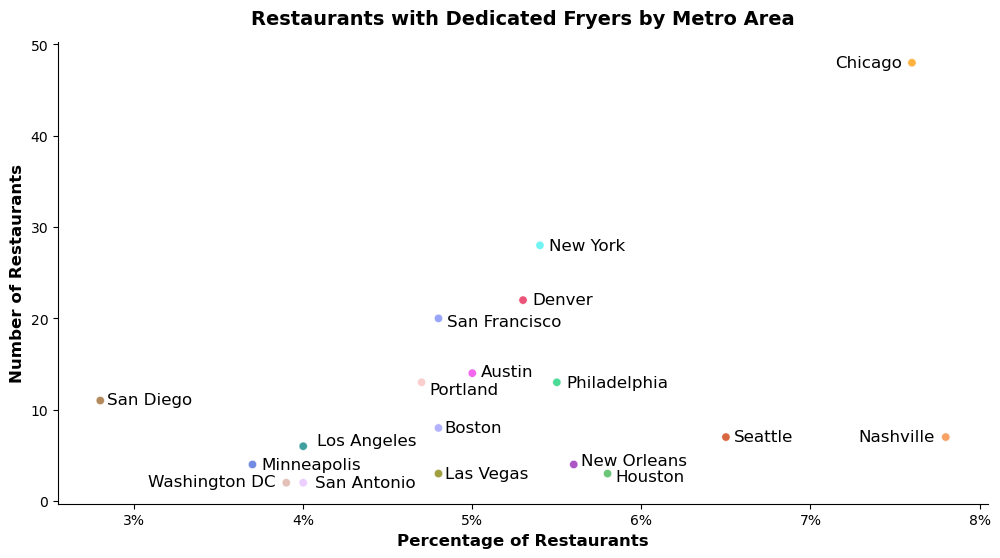

In [108]:
import seaborn as sns
import matplotlib.ticker as ticker
plt.figure(figsize=(12,6))

ded_fryer_perc = 100*round(gf_full_stats_metro.loc[:,('dedicated_fryer','mean')],3)
ded_fryer_num = (gf_full_stats_metro.loc[:,('dedicated_fryer','mean')]*gf_full_stats_metro.loc[:,('num_rests','sum')])

x = ded_fryer_perc
y = ded_fryer_num
colors = ['#f032e6', '#9999ff','#ff9900','#e6194b', '#3cb44b', '#808000', '#008080', '#4363d8',\
          '#f58231', '#911eb4', '#46f0f0', '#10d075', '#fabebe','#e6beff',\
          '#9a6324', '#7787f8', '#cc3300', '#daaba1']
# area = gf_full_stats_metro.loc[:,('num_rests','sum')]
labels = gf_full_stats_metro.index
sns.set_palette(colors)

ax = sns.scatterplot(x, y, sizes=(50,400), hue=labels, alpha=0.75)
# Offsetting metro name text to not overlap
xmult = [1.01,1.0075,.94,1.01,1.0075,1.0075,1.02,1.015,.934,1.0075,1.01,1.01,1.01,1.0175,1.015,1.01,1.0075,.79]
ymult = [1.01,0.998,1,1,0.9,1,1.1,1,1,1.1,1,1,0.94,1,1.01,0.98,1,1.04]
for line in range(0,gf_full_stats_metro.shape[0]):
     texts = [ax.text(x[line]*xmult[line], y[line]*ymult[line], gf_full_stats_metro.index[line], horizontalalignment='left', 
     size=12, color='black', ha='left', va='center')]


plt.title('Restaurants with Dedicated Fryers by Metro Area', size=14,y=1.02, fontweight='bold')
plt.xlabel('Percentage of Restaurants', size=12, fontweight='bold')
plt.ylabel('Number of Restaurants', size=12, fontweight='bold')
# xvals = ax.get_xticks()
# yvals = ax.get_yticks()
# ax.set_yticklabels(['{:,.0%}'.format(y) for y in yvals])
formatter = ticker.FormatStrFormatter('%1.0f%%')
ax.xaxis.set_major_formatter(formatter)
ax.legend_.remove()
sns.despine()
plt.show()

plt.rcdefaults()

# Which Metros have the Most Engaged Users on FindMeGlutenFree.com?

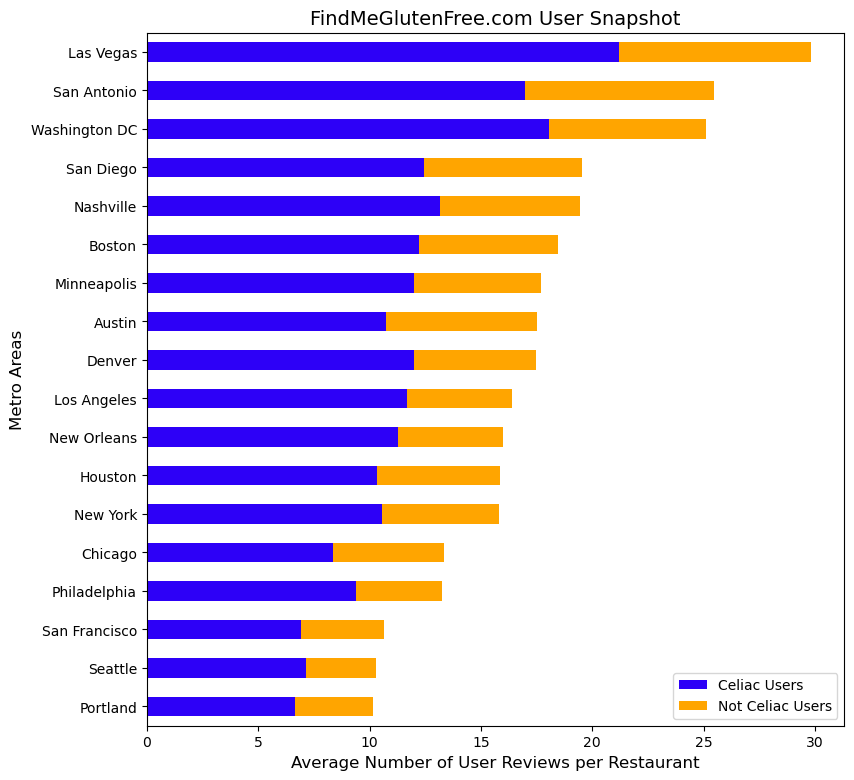

In [155]:
#### Celiac User Engagement Bar Chart by Food Tag ####

gf_full_stats_metro.loc[:,('avg_num_reviews','mean')] = gf_full_stats_metro['num_reviews']['sum']/gf_full_stats_metro['num_rests']['sum']
gf_full_stats_metro.loc[:,('num_celiac_user_revs','mean')] = gf_full_stats_metro.loc[:,('avg_num_reviews','mean')]*gf_full_stats_metro['perc_users_celiac']['mean']
gf_full_stats_metro.loc[:,('num_nonceliac_user_revs','mean')] = gf_full_stats_metro.loc[:,('avg_num_reviews','mean')]*(1-gf_full_stats_metro['perc_users_celiac']['mean'])
celiac_users_sort = gf_full_stats_metro.sort_values([('avg_num_reviews','mean')])
x = celiac_users_sort.loc[:,('num_celiac_user_revs','mean')]
y = celiac_users_sort.loc[:,('num_nonceliac_user_revs','mean')]
rest_tags_just_celiac_users = pd.concat([x, y], axis=1)

ax = rest_tags_just_celiac_users.plot.barh(stacked = True, color = ['#2D00F7','orange'])
plt.title("FindMeGlutenFree.com User Snapshot", size=14)
plt.ylabel("Metro Areas", size=12)
plt.xlabel("Average Number of User Reviews per Restaurant", size=12)

ax.legend(["Celiac Users", "Not Celiac Users"]);
plt.gcf().set_size_inches(9, 9)